In [93]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [94]:
data = pd.read_csv("C:/Users/hp/Dropbox/My PC (LAPTOP-RN0UIHDT)/Downloads/smoke/smoke_detection_iot.csv")
data.head()

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62630 entries, 0 to 62629
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      62630 non-null  int64  
 1   UTC             62630 non-null  int64  
 2   Temperature[C]  62630 non-null  float64
 3   Humidity[%]     62630 non-null  float64
 4   TVOC[ppb]       62630 non-null  int64  
 5   eCO2[ppm]       62630 non-null  int64  
 6   Raw H2          62630 non-null  int64  
 7   Raw Ethanol     62630 non-null  int64  
 8   Pressure[hPa]   62630 non-null  float64
 9   PM1.0           62630 non-null  float64
 10  PM2.5           62630 non-null  float64
 11  NC0.5           62630 non-null  float64
 12  NC1.0           62630 non-null  float64
 13  NC2.5           62630 non-null  float64
 14  CNT             62630 non-null  int64  
 15  Fire Alarm      62630 non-null  int64  
dtypes: float64(8), int64(8)
memory usage: 7.6 MB


In [4]:
data.shape

(62630, 16)

In [5]:
data.describe()

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
count,62630.000000,6.263000e+04,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000
mean,31314.500000,1.654792e+09,15.970424,48.539499,1942.057528,670.021044,12942.453936,19754.257912,938.627649,100.594309,184.467770,491.463608,203.586487,80.049042,10511.386157,0.714626
std,18079.868017,1.100025e+05,14.359576,8.865367,7811.589055,1905.885439,272.464305,609.513156,1.331344,922.524245,1976.305615,4265.661251,2214.738556,1083.383189,7597.870997,0.451596
min,0.000000,1.654712e+09,-22.010000,10.740000,0.000000,400.000000,10668.000000,15317.000000,930.852000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15657.250000,1.654743e+09,10.994250,47.530000,130.000000,400.000000,12830.000000,19435.000000,938.700000,1.280000,1.340000,8.820000,1.384000,0.033000,3625.250000,0.000000
50%,31314.500000,1.654762e+09,20.130000,50.150000,981.000000,400.000000,12924.000000,19501.000000,938.816000,1.810000,1.880000,12.450000,1.943000,0.044000,9336.000000,1.000000
75%,46971.750000,1.654778e+09,25.409500,53.240000,1189.000000,438.000000,13109.000000,20078.000000,939.418000,2.090000,2.180000,14.420000,2.249000,0.051000,17164.750000,1.000000
max,62629.000000,1.655130e+09,59.930000,75.200000,60000.000000,60000.000000,13803.000000,21410.000000,939.861000,14333.690000,45432.260000,61482.030000,51914.680000,30026.438000,24993.000000,1.000000


In [6]:
data.isna().sum()

Unnamed: 0        0
UTC               0
Temperature[C]    0
Humidity[%]       0
TVOC[ppb]         0
eCO2[ppm]         0
Raw H2            0
Raw Ethanol       0
Pressure[hPa]     0
PM1.0             0
PM2.5             0
NC0.5             0
NC1.0             0
NC2.5             0
CNT               0
Fire Alarm        0
dtype: int64

In [7]:
data.columns

Index(['Unnamed: 0', 'UTC', 'Temperature[C]', 'Humidity[%]', 'TVOC[ppb]',
       'eCO2[ppm]', 'Raw H2', 'Raw Ethanol', 'Pressure[hPa]', 'PM1.0', 'PM2.5',
       'NC0.5', 'NC1.0', 'NC2.5', 'CNT', 'Fire Alarm'],
      dtype='object')

In [95]:
data.drop(columns = ['Unnamed: 0','UTC','CNT'],inplace = True)
data.head()

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,Fire Alarm
0,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0
1,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,0
2,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,0
3,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,0
4,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,0


In [9]:
data['Fire Alarm'].value_counts()

1    44757
0    17873
Name: Fire Alarm, dtype: int64

## Visualization techniques

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

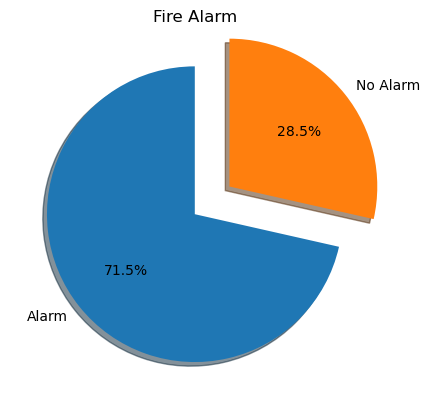

In [13]:
plt.pie(data['Fire Alarm'].value_counts(),explode=[0,0.3],labels=['Alarm','No Alarm'],autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title('Fire Alarm')
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_16424\2756744555.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Temperature[C]'])


<Axes: xlabel='Temperature[C]', ylabel='Density'>

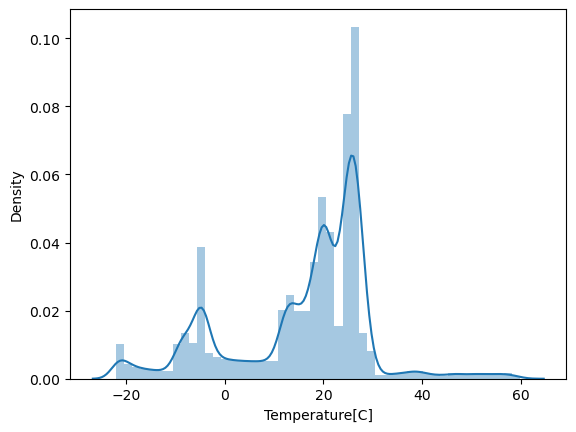

In [18]:
sns.distplot(data['Temperature[C]'])

C:\Users\hp\AppData\Local\Temp\ipykernel_16424\1721269455.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Pressure[hPa]'])


<Axes: xlabel='Pressure[hPa]', ylabel='Density'>

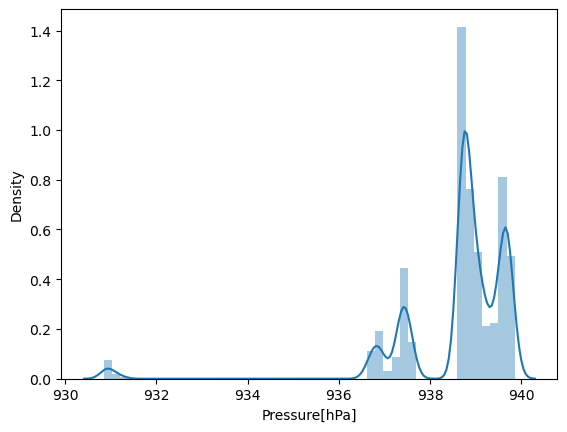

In [19]:
sns.distplot(data['Pressure[hPa]'])

<Axes: xlabel='PM1.0', ylabel='PM2.5'>

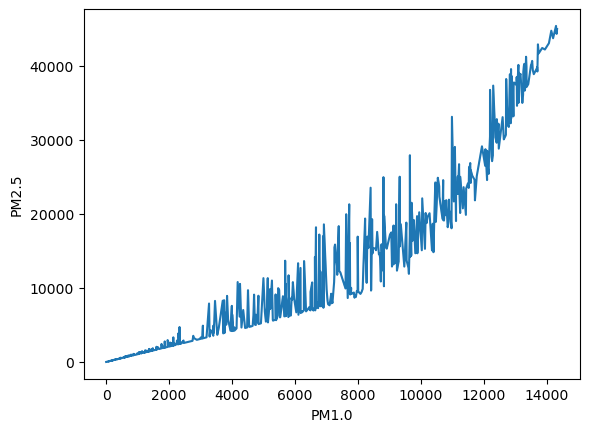

In [21]:
sns.lineplot(x=data['PM1.0'],y=data['PM2.5'])

<Axes: xlabel='Raw H2', ylabel='Raw Ethanol'>

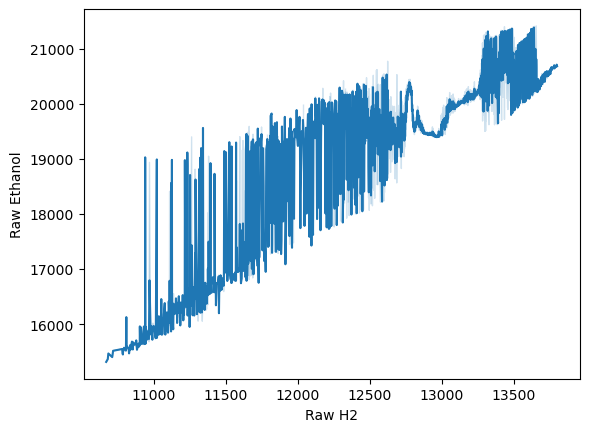

In [22]:
sns.lineplot(x=data['Raw H2'],y=data['Raw Ethanol'])

<Axes: >

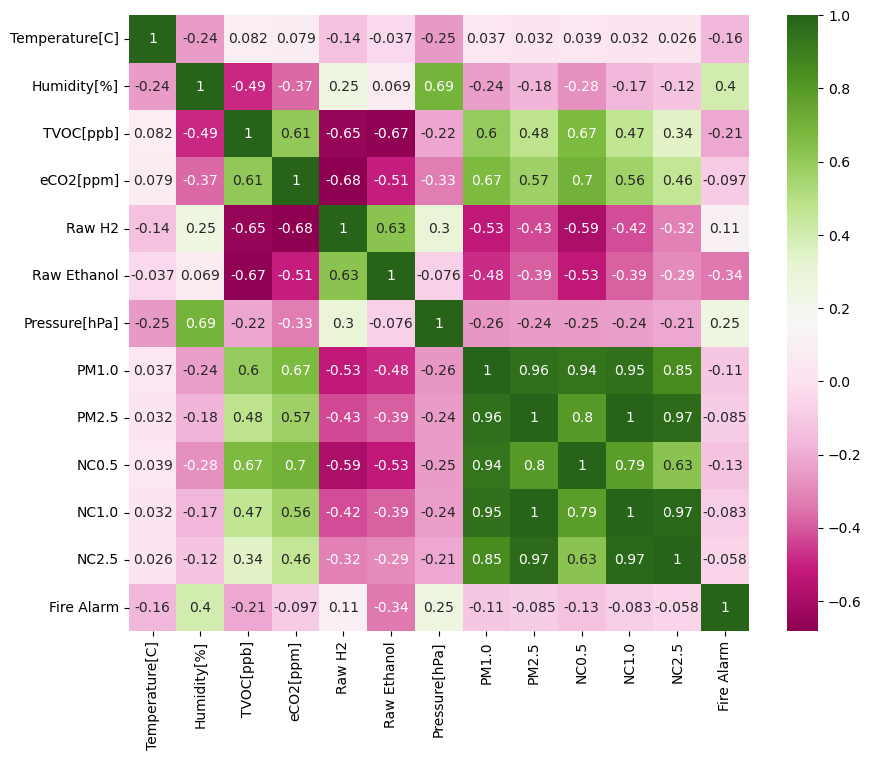

In [97]:
plt.figure(figsize=(10,8))

sns.heatmap(data.corr(),annot=True,cmap="PiYG")

## Feature Extraction

In [98]:
cols = [1,3,6,7,8,9,10,12]
data_1 = data[data.columns[cols]]
data = data_1
data

,Humidity[%],eCO2[ppm],Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,Fire Alarm
0,57.36,400,939.735,0.00,0.00,0.00,0.000,0
1,56.67,400,939.744,0.00,0.00,0.00,0.000,0
2,55.96,400,939.738,0.00,0.00,0.00,0.000,0
3,55.28,400,939.736,0.00,0.00,0.00,0.000,0
4,54.69,400,939.744,0.00,0.00,0.00,0.000,0
...,...,...,...,...,...,...,...,...
62625,15.79,400,936.670,0.63,0.65,4.32,0.673,0
62626,15.87,400,936.678,0.61,0.63,4.18,0.652,0
62627,15.84,400,936.687,0.57,0.60,3.95,0.617,0
62628,16.04,400,936.680,0.57,0.59,3.92,0.611,0


## Spliting

In [99]:
X = data.iloc[:,:-1]
y = data['Fire Alarm']
X

,Humidity[%],eCO2[ppm],Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0
0,57.36,400,939.735,0.00,0.00,0.00,0.000
1,56.67,400,939.744,0.00,0.00,0.00,0.000
2,55.96,400,939.738,0.00,0.00,0.00,0.000
3,55.28,400,939.736,0.00,0.00,0.00,0.000
4,54.69,400,939.744,0.00,0.00,0.00,0.000
...,...,...,...,...,...,...,...
62625,15.79,400,936.670,0.63,0.65,4.32,0.673
62626,15.87,400,936.678,0.61,0.63,4.18,0.652
62627,15.84,400,936.687,0.57,0.60,3.95,0.617
62628,16.04,400,936.680,0.57,0.59,3.92,0.611


In [100]:
y.value_counts()

1    44757
0    17873
Name: Fire Alarm, dtype: int64

## Balancing the imbalanced dataset

In [101]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(sampling_strategy=0.65)

In [102]:
X_bal,y_bal = ros.fit_resample(X,y)

In [103]:
print(y.value_counts())
print(y_bal.value_counts())

1    44757
0    17873
Name: Fire Alarm, dtype: int64
1    44757
0    29092
Name: Fire Alarm, dtype: int64


In [104]:
X_train,X_test,y_train,y_test = train_test_split(X_bal,y_bal,test_size = 0.25,random_state = 59)
X_train.head()

,Humidity[%],eCO2[ppm],Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0
16772,47.97,429,938.760,1.85,1.92,12.75,1.988
53703,42.48,424,937.317,1.82,1.89,12.51,1.950
19487,53.23,404,938.702,1.51,1.57,10.40,1.622
55216,52.60,400,936.974,0.45,0.47,3.08,0.481
11906,47.12,611,939.024,2.29,2.38,15.75,2.456


## Naive Bayes

In [105]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [106]:
nb.fit(X_train,y_train)

GaussianNB()

In [107]:
y_pred = nb.predict(X_test)

In [108]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.6576396035313871


## Logistic Regression

In [109]:
from sklearn.linear_model import LogisticRegression

In [110]:
from sklearn.model_selection import GridSearchCV
parameters = {
        'penalty':['l1','l2','elasticnet'],
        'solver':[
            'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
        'C':[0.1,0.5,1.0,1.3]
}

In [111]:
clf = GridSearchCV(LogisticRegression(),param_grid = parameters,verbose = 2)
clf.fit(X_train,y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END ....................C=0.1, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ....................C=0.1, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ....................C=0.1, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ....................C=0.1, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ....................C=0.1, penalty=l1, solver=lbfgs; total time=   0.0s


C:\Users\hp\anaconda3_1\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END ................C=0.1, penalty=l1, solver=liblinear; total time=   2.9s


C:\Users\hp\anaconda3_1\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END ................C=0.1, penalty=l1, solver=liblinear; total time=   2.7s


C:\Users\hp\anaconda3_1\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END ................C=0.1, penalty=l1, solver=liblinear; total time=   2.4s


C:\Users\hp\anaconda3_1\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END ................C=0.1, penalty=l1, solver=liblinear; total time=   2.7s


C:\Users\hp\anaconda3_1\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END ................C=0.1, penalty=l1, solver=liblinear; total time=   2.4s
[CV] END ................C=0.1, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ................C=0.1, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ................C=0.1, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ................C=0.1, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ................C=0.1, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..........C=0.1, penalty=l1, solver=newton-cholesky; total time=   0.0s
[CV] END ..........C=0.1, penalty=l1, solver=newton-cholesky; total time=   0.0s
[CV] END ..........C=0.1, penalty=l1, solver=newton-cholesky; total time=   0.0s
[CV] END ..........C=0.1, penalty=l1, solver=newton-cholesky; total time=   0.0s
[CV] END ..........C=0.1, penalty=l1, solver=newton-cholesky; total time=   0.0s
[CV] END ......................C=0.1, penalty=l1, solver=sag; total time=   0.0s
[CV] END ...................

C:\Users\hp\anaconda3_1\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=0.1, penalty=l1, solver=saga; total time=   1.4s


C:\Users\hp\anaconda3_1\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=0.1, penalty=l1, solver=saga; total time=   1.4s


C:\Users\hp\anaconda3_1\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=0.1, penalty=l1, solver=saga; total time=   1.3s


C:\Users\hp\anaconda3_1\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=0.1, penalty=l1, solver=saga; total time=   1.2s


C:\Users\hp\anaconda3_1\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=0.1, penalty=l1, solver=saga; total time=   1.1s
[CV] END ....................C=0.1, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END ....................C=0.1, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....................C=0.1, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....................C=0.1, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....................C=0.1, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ................C=0.1, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ................C=0.1, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ................C=0.1, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END ................C=0.1, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ................C=0.1, penalty=l2, solver=liblinear; total time=   0.2s


C:\Users\hp\anaconda3_1\lib\site-packages\scipy\optimize\_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\hp\anaconda3_1\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\hp\anaconda3_1\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV] END ................C=0.1, penalty=l2, solver=newton-cg; total time=   1.8s


C:\Users\hp\anaconda3_1\lib\site-packages\scipy\optimize\_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\hp\anaconda3_1\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\hp\anaconda3_1\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV] END ................C=0.1, penalty=l2, solver=newton-cg; total time=   1.9s


C:\Users\hp\anaconda3_1\lib\site-packages\scipy\optimize\_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\hp\anaconda3_1\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\hp\anaconda3_1\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV] END ................C=0.1, penalty=l2, solver=newton-cg; total time=   2.0s


C:\Users\hp\anaconda3_1\lib\site-packages\scipy\optimize\_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\hp\anaconda3_1\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\hp\anaconda3_1\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV] END ................C=0.1, penalty=l2, solver=newton-cg; total time=   1.9s


C:\Users\hp\anaconda3_1\lib\site-packages\scipy\optimize\_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\hp\anaconda3_1\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\hp\anaconda3_1\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV] END ................C=0.1, penalty=l2, solver=newton-cg; total time=   1.9s
[CV] END ..........C=0.1, penalty=l2, solver=newton-cholesky; total time=   0.0s
[CV] END ..........C=0.1, penalty=l2, solver=newton-cholesky; total time=   0.0s
[CV] END ..........C=0.1, penalty=l2, solver=newton-cholesky; total time=   0.0s
[CV] END ..........C=0.1, penalty=l2, solver=newton-cholesky; total time=   0.0s
[CV] END ..........C=0.1, penalty=l2, solver=newton-cholesky; total time=   0.0s


C:\Users\hp\anaconda3_1\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......................C=0.1, penalty=l2, solver=sag; total time=   1.0s


C:\Users\hp\anaconda3_1\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......................C=0.1, penalty=l2, solver=sag; total time=   1.1s


C:\Users\hp\anaconda3_1\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......................C=0.1, penalty=l2, solver=sag; total time=   1.1s


C:\Users\hp\anaconda3_1\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......................C=0.1, penalty=l2, solver=sag; total time=   0.9s


C:\Users\hp\anaconda3_1\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......................C=0.1, penalty=l2, solver=sag; total time=   1.1s


C:\Users\hp\anaconda3_1\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=0.1, penalty=l2, solver=saga; total time=   1.2s


C:\Users\hp\anaconda3_1\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=0.1, penalty=l2, solver=saga; total time=   1.2s


C:\Users\hp\anaconda3_1\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=0.1, penalty=l2, solver=saga; total time=   1.1s


C:\Users\hp\anaconda3_1\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=0.1, penalty=l2, solver=saga; total time=   1.0s


C:\Users\hp\anaconda3_1\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=0.1, penalty=l2, solver=saga; total time=   0.9s
[CV] END ............C=0.1, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END ............C=0.1, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END ............C=0.1, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END ............C=0.1, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END ............C=0.1, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END ........C=0.1, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END ........C=0.1, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END ........C=0.1, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END ........C=0.1, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END ........C=0.1, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END ........C=0.1, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END ........C=0.1, pena

C:\Users\hp\anaconda3_1\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END ................C=0.5, penalty=l1, solver=liblinear; total time=   2.1s


C:\Users\hp\anaconda3_1\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END ................C=0.5, penalty=l1, solver=liblinear; total time=   2.0s


C:\Users\hp\anaconda3_1\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END ................C=0.5, penalty=l1, solver=liblinear; total time=   2.6s
[CV] END ................C=0.5, penalty=l1, solver=liblinear; total time=   1.6s
[CV] END ................C=0.5, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ................C=0.5, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ................C=0.5, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ................C=0.5, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ................C=0.5, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..........C=0.5, penalty=l1, solver=newton-cholesky; total time=   0.0s
[CV] END ..........C=0.5, penalty=l1, solver=newton-cholesky; total time=   0.0s
[CV] END ..........C=0.5, penalty=l1, solver=newton-cholesky; total time=   0.0s
[CV] END ..........C=0.5, penalty=l1, solver=newton-cholesky; total time=   0.0s
[CV] END ..........C=0.5, penalty=l1, solver=newton-cholesky; total time=   0.0s
[CV] END ...................

C:\Users\hp\anaconda3_1\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=0.5, penalty=l1, solver=saga; total time=   1.0s


C:\Users\hp\anaconda3_1\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=0.5, penalty=l1, solver=saga; total time=   1.2s


C:\Users\hp\anaconda3_1\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=0.5, penalty=l1, solver=saga; total time=   1.3s


C:\Users\hp\anaconda3_1\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=0.5, penalty=l1, solver=saga; total time=   1.3s


C:\Users\hp\anaconda3_1\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=0.5, penalty=l1, solver=saga; total time=   1.1s
[CV] END ....................C=0.5, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....................C=0.5, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....................C=0.5, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....................C=0.5, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....................C=0.5, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ................C=0.5, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ................C=0.5, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ................C=0.5, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ................C=0.5, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ................C=0.5, penalty=l2, solver=liblinear; total time=   0.2s


C:\Users\hp\anaconda3_1\lib\site-packages\scipy\optimize\_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\hp\anaconda3_1\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\hp\anaconda3_1\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV] END ................C=0.5, penalty=l2, solver=newton-cg; total time=   1.8s


C:\Users\hp\anaconda3_1\lib\site-packages\scipy\optimize\_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\hp\anaconda3_1\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\hp\anaconda3_1\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV] END ................C=0.5, penalty=l2, solver=newton-cg; total time=   2.3s


C:\Users\hp\anaconda3_1\lib\site-packages\scipy\optimize\_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\hp\anaconda3_1\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\hp\anaconda3_1\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV] END ................C=0.5, penalty=l2, solver=newton-cg; total time=   2.2s


C:\Users\hp\anaconda3_1\lib\site-packages\scipy\optimize\_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\hp\anaconda3_1\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\hp\anaconda3_1\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV] END ................C=0.5, penalty=l2, solver=newton-cg; total time=   2.0s


C:\Users\hp\anaconda3_1\lib\site-packages\scipy\optimize\_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\hp\anaconda3_1\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\hp\anaconda3_1\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV] END ................C=0.5, penalty=l2, solver=newton-cg; total time=   1.9s
[CV] END ..........C=0.5, penalty=l2, solver=newton-cholesky; total time=   0.0s
[CV] END ..........C=0.5, penalty=l2, solver=newton-cholesky; total time=   0.0s
[CV] END ..........C=0.5, penalty=l2, solver=newton-cholesky; total time=   0.0s
[CV] END ..........C=0.5, penalty=l2, solver=newton-cholesky; total time=   0.0s
[CV] END ..........C=0.5, penalty=l2, solver=newton-cholesky; total time=   0.0s


C:\Users\hp\anaconda3_1\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......................C=0.5, penalty=l2, solver=sag; total time=   1.0s


C:\Users\hp\anaconda3_1\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......................C=0.5, penalty=l2, solver=sag; total time=   1.1s


C:\Users\hp\anaconda3_1\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......................C=0.5, penalty=l2, solver=sag; total time=   1.2s


C:\Users\hp\anaconda3_1\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......................C=0.5, penalty=l2, solver=sag; total time=   1.0s


C:\Users\hp\anaconda3_1\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......................C=0.5, penalty=l2, solver=sag; total time=   0.9s


C:\Users\hp\anaconda3_1\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=0.5, penalty=l2, solver=saga; total time=   1.1s


C:\Users\hp\anaconda3_1\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=0.5, penalty=l2, solver=saga; total time=   1.1s


C:\Users\hp\anaconda3_1\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=0.5, penalty=l2, solver=saga; total time=   1.0s


C:\Users\hp\anaconda3_1\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=0.5, penalty=l2, solver=saga; total time=   1.1s


C:\Users\hp\anaconda3_1\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=0.5, penalty=l2, solver=saga; total time=   1.1s
[CV] END ............C=0.5, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END ............C=0.5, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END ............C=0.5, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END ............C=0.5, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END ............C=0.5, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END ........C=0.5, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END ........C=0.5, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END ........C=0.5, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END ........C=0.5, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END ........C=0.5, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END ........C=0.5, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END ........C=0.5, pena

C:\Users\hp\anaconda3_1\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=1.0, penalty=l1, solver=saga; total time=   1.4s


C:\Users\hp\anaconda3_1\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=1.0, penalty=l1, solver=saga; total time=   1.4s


C:\Users\hp\anaconda3_1\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=1.0, penalty=l1, solver=saga; total time=   1.3s


C:\Users\hp\anaconda3_1\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=1.0, penalty=l1, solver=saga; total time=   1.2s


C:\Users\hp\anaconda3_1\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=1.0, penalty=l1, solver=saga; total time=   1.3s
[CV] END ....................C=1.0, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....................C=1.0, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....................C=1.0, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....................C=1.0, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END ....................C=1.0, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END ................C=1.0, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ................C=1.0, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ................C=1.0, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ................C=1.0, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ................C=1.0, penalty=l2, solver=liblinear; total time=   0.2s


C:\Users\hp\anaconda3_1\lib\site-packages\scipy\optimize\_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\hp\anaconda3_1\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\hp\anaconda3_1\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV] END ................C=1.0, penalty=l2, solver=newton-cg; total time=   2.0s


C:\Users\hp\anaconda3_1\lib\site-packages\scipy\optimize\_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\hp\anaconda3_1\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\hp\anaconda3_1\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV] END ................C=1.0, penalty=l2, solver=newton-cg; total time=   2.0s


C:\Users\hp\anaconda3_1\lib\site-packages\scipy\optimize\_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\hp\anaconda3_1\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\hp\anaconda3_1\lib\site-packages\scipy\optimize\_linesearch.py:416: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\Users\hp\anaconda3_1\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV] END ................C=1.0, penalty=l2, solver=newton-cg; total time=   1.5s


C:\Users\hp\anaconda3_1\lib\site-packages\scipy\optimize\_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\hp\anaconda3_1\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\hp\anaconda3_1\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV] END ................C=1.0, penalty=l2, solver=newton-cg; total time=   1.9s


C:\Users\hp\anaconda3_1\lib\site-packages\scipy\optimize\_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\hp\anaconda3_1\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\hp\anaconda3_1\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV] END ................C=1.0, penalty=l2, solver=newton-cg; total time=   2.1s
[CV] END ..........C=1.0, penalty=l2, solver=newton-cholesky; total time=   0.0s
[CV] END ..........C=1.0, penalty=l2, solver=newton-cholesky; total time=   0.0s
[CV] END ..........C=1.0, penalty=l2, solver=newton-cholesky; total time=   0.0s
[CV] END ..........C=1.0, penalty=l2, solver=newton-cholesky; total time=   0.0s
[CV] END ..........C=1.0, penalty=l2, solver=newton-cholesky; total time=   0.0s


C:\Users\hp\anaconda3_1\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......................C=1.0, penalty=l2, solver=sag; total time=   1.1s


C:\Users\hp\anaconda3_1\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......................C=1.0, penalty=l2, solver=sag; total time=   1.1s


C:\Users\hp\anaconda3_1\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......................C=1.0, penalty=l2, solver=sag; total time=   1.2s


C:\Users\hp\anaconda3_1\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......................C=1.0, penalty=l2, solver=sag; total time=   1.1s


C:\Users\hp\anaconda3_1\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......................C=1.0, penalty=l2, solver=sag; total time=   1.0s


C:\Users\hp\anaconda3_1\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=1.0, penalty=l2, solver=saga; total time=   1.0s


C:\Users\hp\anaconda3_1\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=1.0, penalty=l2, solver=saga; total time=   1.1s


C:\Users\hp\anaconda3_1\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=1.0, penalty=l2, solver=saga; total time=   1.0s


C:\Users\hp\anaconda3_1\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=1.0, penalty=l2, solver=saga; total time=   1.0s


C:\Users\hp\anaconda3_1\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=1.0, penalty=l2, solver=saga; total time=   1.0s
[CV] END ............C=1.0, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END ............C=1.0, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END ............C=1.0, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END ............C=1.0, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END ............C=1.0, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END ........C=1.0, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END ........C=1.0, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END ........C=1.0, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END ........C=1.0, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END ........C=1.0, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END ........C=1.0, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END ........C=1.0, pena

C:\Users\hp\anaconda3_1\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=1.3, penalty=l1, solver=saga; total time=   1.3s


C:\Users\hp\anaconda3_1\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=1.3, penalty=l1, solver=saga; total time=   1.1s


C:\Users\hp\anaconda3_1\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=1.3, penalty=l1, solver=saga; total time=   1.1s


C:\Users\hp\anaconda3_1\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=1.3, penalty=l1, solver=saga; total time=   1.2s


C:\Users\hp\anaconda3_1\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=1.3, penalty=l1, solver=saga; total time=   1.5s
[CV] END ....................C=1.3, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....................C=1.3, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....................C=1.3, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END ....................C=1.3, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END ....................C=1.3, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END ................C=1.3, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END ................C=1.3, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END ................C=1.3, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END ................C=1.3, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ................C=1.3, penalty=l2, solver=liblinear; total time=   0.2s


C:\Users\hp\anaconda3_1\lib\site-packages\scipy\optimize\_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\hp\anaconda3_1\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\hp\anaconda3_1\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV] END ................C=1.3, penalty=l2, solver=newton-cg; total time=   2.0s


C:\Users\hp\anaconda3_1\lib\site-packages\scipy\optimize\_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\hp\anaconda3_1\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\hp\anaconda3_1\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV] END ................C=1.3, penalty=l2, solver=newton-cg; total time=   2.0s


C:\Users\hp\anaconda3_1\lib\site-packages\scipy\optimize\_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\hp\anaconda3_1\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\hp\anaconda3_1\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV] END ................C=1.3, penalty=l2, solver=newton-cg; total time=   1.8s


C:\Users\hp\anaconda3_1\lib\site-packages\scipy\optimize\_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\hp\anaconda3_1\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\hp\anaconda3_1\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV] END ................C=1.3, penalty=l2, solver=newton-cg; total time=   1.6s


C:\Users\hp\anaconda3_1\lib\site-packages\scipy\optimize\_linesearch.py:457: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\hp\anaconda3_1\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\hp\anaconda3_1\lib\site-packages\scipy\optimize\_linesearch.py:416: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\Users\hp\anaconda3_1\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV] END ................C=1.3, penalty=l2, solver=newton-cg; total time=   1.7s
[CV] END ..........C=1.3, penalty=l2, solver=newton-cholesky; total time=   0.0s
[CV] END ..........C=1.3, penalty=l2, solver=newton-cholesky; total time=   0.0s
[CV] END ..........C=1.3, penalty=l2, solver=newton-cholesky; total time=   0.0s
[CV] END ..........C=1.3, penalty=l2, solver=newton-cholesky; total time=   0.0s
[CV] END ..........C=1.3, penalty=l2, solver=newton-cholesky; total time=   0.0s


C:\Users\hp\anaconda3_1\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......................C=1.3, penalty=l2, solver=sag; total time=   0.9s


C:\Users\hp\anaconda3_1\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......................C=1.3, penalty=l2, solver=sag; total time=   0.8s


C:\Users\hp\anaconda3_1\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......................C=1.3, penalty=l2, solver=sag; total time=   0.9s


C:\Users\hp\anaconda3_1\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......................C=1.3, penalty=l2, solver=sag; total time=   0.9s


C:\Users\hp\anaconda3_1\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......................C=1.3, penalty=l2, solver=sag; total time=   0.9s


C:\Users\hp\anaconda3_1\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=1.3, penalty=l2, solver=saga; total time=   0.9s


C:\Users\hp\anaconda3_1\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=1.3, penalty=l2, solver=saga; total time=   0.9s


C:\Users\hp\anaconda3_1\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=1.3, penalty=l2, solver=saga; total time=   0.9s


C:\Users\hp\anaconda3_1\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=1.3, penalty=l2, solver=saga; total time=   0.9s


C:\Users\hp\anaconda3_1\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\hp\anaconda3_1\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
200 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\hp\anaconda3_1\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hp\anaconda3_1\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(se

[CV] END .....................C=1.3, penalty=l2, solver=saga; total time=   1.0s
[CV] END ............C=1.3, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END ............C=1.3, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END ............C=1.3, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END ............C=1.3, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END ............C=1.3, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END ........C=1.3, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END ........C=1.3, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END ........C=1.3, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END ........C=1.3, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END ........C=1.3, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END ........C=1.3, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END ........C=1.3, pena

C:\Users\hp\anaconda3_1\lib\site-packages\sklearn\model_selection\_search.py:952: UserWarning: One or more of the test scores are non-finite: [       nan 0.7661322         nan        nan        nan 0.61966924
 0.76667385 0.76654747 0.76353227 0.76315311 0.62012062 0.61966924
        nan        nan        nan        nan        nan        nan
        nan 0.76663775        nan        nan        nan 0.61966924
 0.76667385 0.76654747 0.76358644 0.76320728 0.62012062 0.61966924
        nan        nan        nan        nan        nan        nan
        nan 0.76674607        nan        nan        nan 0.61966924
 0.76667385 0.76654747 0.76344199 0.76335172 0.62012062 0.61966924
        nan        nan        nan        nan        nan        nan
        nan 0.76678218        nan        nan        nan 0.61966924
 0.76667385 0.76654747 0.76349616 0.76326145 0.62012062 0.61966924
        nan        nan        nan        nan        nan        nan]
  warnings.warn(


GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.1, 0.5, 1.0, 1.3],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             verbose=2)

In [112]:
clf.best_score_

0.7667821841506213

In [113]:
clf.best_params_

{'C': 1.3, 'penalty': 'l1', 'solver': 'liblinear'}

In [114]:
model = LogisticRegression(penalty = 'l1' ,C=1.3, solver = 'liblinear')

In [115]:
model.fit(X_train,y_train)

LogisticRegression(C=1.3, penalty='l1', solver='liblinear')

In [116]:
y_pred = model.predict(X_test)

In [117]:
print(accuracy_score(y_test,y_pred)*100)

77.05140009749229


## Gradient Boosting Classifier

In [118]:
from sklearn.ensemble import GradientBoostingClassifier

In [119]:
param = {
    'loss':['log_loss', 'exponential'],
    'learning_rate':[0.3,0.7,1.0,1.7],
    'n_estimators':[5,7,12,15,20]
}

In [ ]:
clf = GridSearchCV(GradientBoostingClassifier(),param_grid = param,verbose=0)
clf.fit(X_train,y_train)

In [ ]:
clf.best_score_

In [ ]:
clf.best_params_

In [120]:
gbc = GradientBoostingClassifier(learning_rate= 0.3, loss= 'exponential', n_estimators= 5)

In [121]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.3, loss='exponential',
                           n_estimators=5)

In [122]:
y_pred = gbc.predict(X_test)

In [123]:
accuracy_score(y_test,y_pred)

0.9711314520933759

## SVM Classifier

In [124]:
from sklearn.svm import SVC

In [37]:
param = {
    'C':[1,10,20],
    'kernel':['rbf','sigmoid','linear','poly'],
    'degree':[5,10,15],
}

In [47]:
clf = GridSearchCV(SVC(),param_grid = param,verbose = 2)
clf.fit(X_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END ..........................C=1, degree=5, kernel=rbf; total time=  51.4s
[CV] END ..........................C=1, degree=5, kernel=rbf; total time=  49.1s
[CV] END ..........................C=1, degree=5, kernel=rbf; total time=  49.6s
[CV] END ..........................C=1, degree=5, kernel=rbf; total time=  50.3s
[CV] END ..........................C=1, degree=5, kernel=rbf; total time=  50.9s
[CV] END ......................C=1, degree=5, kernel=sigmoid; total time= 2.5min
[CV] END ......................C=1, degree=5, kernel=sigmoid; total time= 2.4min
[CV] END ......................C=1, degree=5, kernel=sigmoid; total time= 2.6min
[CV] END ......................C=1, degree=5, kernel=sigmoid; total time= 2.5min
[CV] END ......................C=1, degree=5, kernel=sigmoid; total time= 2.7min
[CV] END .......................C=1, degree=5, kernel=linear; total time= 1.4min
[CV] END .......................C=1, degree=5, 

[CV] END ........................C=10, degree=15, kernel=rbf; total time=  33.8s
[CV] END ........................C=10, degree=15, kernel=rbf; total time=  43.0s
[CV] END ........................C=10, degree=15, kernel=rbf; total time=  45.6s
[CV] END ........................C=10, degree=15, kernel=rbf; total time=  34.7s
[CV] END ....................C=10, degree=15, kernel=sigmoid; total time= 2.4min
[CV] END ....................C=10, degree=15, kernel=sigmoid; total time= 3.2min
[CV] END ....................C=10, degree=15, kernel=sigmoid; total time= 2.7min
[CV] END ....................C=10, degree=15, kernel=sigmoid; total time= 2.7min
[CV] END ....................C=10, degree=15, kernel=sigmoid; total time= 2.8min
[CV] END .....................C=10, degree=15, kernel=linear; total time= 2.4min
[CV] END .....................C=10, degree=15, kernel=linear; total time= 2.6min
[CV] END .....................C=10, degree=15, kernel=linear; total time= 2.3min
[CV] END ...................

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10, 20], 'degree': [5, 10, 15],
                         'kernel': ['rbf', 'sigmoid', 'linear', 'poly']},
             verbose=2)

In [50]:
clf.best_score_

0.9904669695389886

In [51]:
clf.best_params_

{'C': 20, 'degree': 5, 'kernel': 'rbf'}

In [69]:
model = SVC(C=20,degree=5,kernel = 'rbf',gamma='scale')

In [70]:
model.fit(X_train,y_train)

SVC(C=20, degree=5)

In [71]:
y_pred = model.predict(X_test)

In [72]:
print(accuracy_score(y_test,y_pred))

0.6562855440610952


## KNN Classifier

In [125]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=850)

In [126]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=850)

In [127]:
y_pred = knn.predict(X_test)

In [128]:
print(accuracy_score(y_test,y_pred))

0.8831175865244002
